<a href="https://colab.research.google.com/github/lijuSam/Link-Prediction-in-Graphs-M.tech-Thesis-/blob/main/Input_graph_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for some basic operations
import numpy as np 
import pandas as pd 

# for graph network operations
import networkx as nx
import networkx.algorithms.community as nxcom

In [ ]:
G= nx.read_edgelist('1912.edges')
AM= nx.adjacency_matrix(G)

In [ ]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes : %d" % n)
print("Number of edges : %d" % m)
print("Number of connected components : %d" % nx.number_connected_components(G))

Number of nodes : 747
Number of edges : 30025
Number of connected components : 2


In [ ]:
print(nx.info(G))

Graph with 747 nodes and 30025 edges


In [ ]:
G.edges()

EdgeView([('2290', '2363'), ('2290', '2430'), ('2290', '2306'), ('2290', '2084'), ('2290', '2276'), ('2290', '2020'), ('2290', '2059'), ('2290', '2600'), ('2290', '2334'), ('2290', '2037'), ('2290', '2433'), ('2290', '2210'), ('2290', '2220'), ('2290', '2040'), ('2290', '2063'), ('2290', '2095'), ('2290', '2184'), ('2290', '2469'), ('2290', '2308'), ('2290', '2655'), ('2290', '1963'), ('2290', '2654'), ('2290', '2122'), ('2290', '2244'), ('2290', '2188'), ('2290', '2271'), ('2290', '2625'), ('2290', '2624'), ('2290', '2045'), ('2290', '2253'), ('2290', '1917'), ('2290', '2172'), ('2290', '2257'), ('2290', '2112'), ('2290', '2376'), ('2290', '2354'), ('2290', '1989'), ('2290', '2123'), ('2290', '2331'), ('2290', '2233'), ('2290', '2190'), ('2290', '2212'), ('2290', '2630'), ('2290', '1983'), ('2290', '2093'), ('2290', '2077'), ('2290', '2546'), ('2290', '1943'), ('2290', '2069'), ('2290', '2090'), ('2290', '2623'), ('2290', '2356'), ('2290', '2083'), ('2290', '2326'), ('2290', '2553'), 

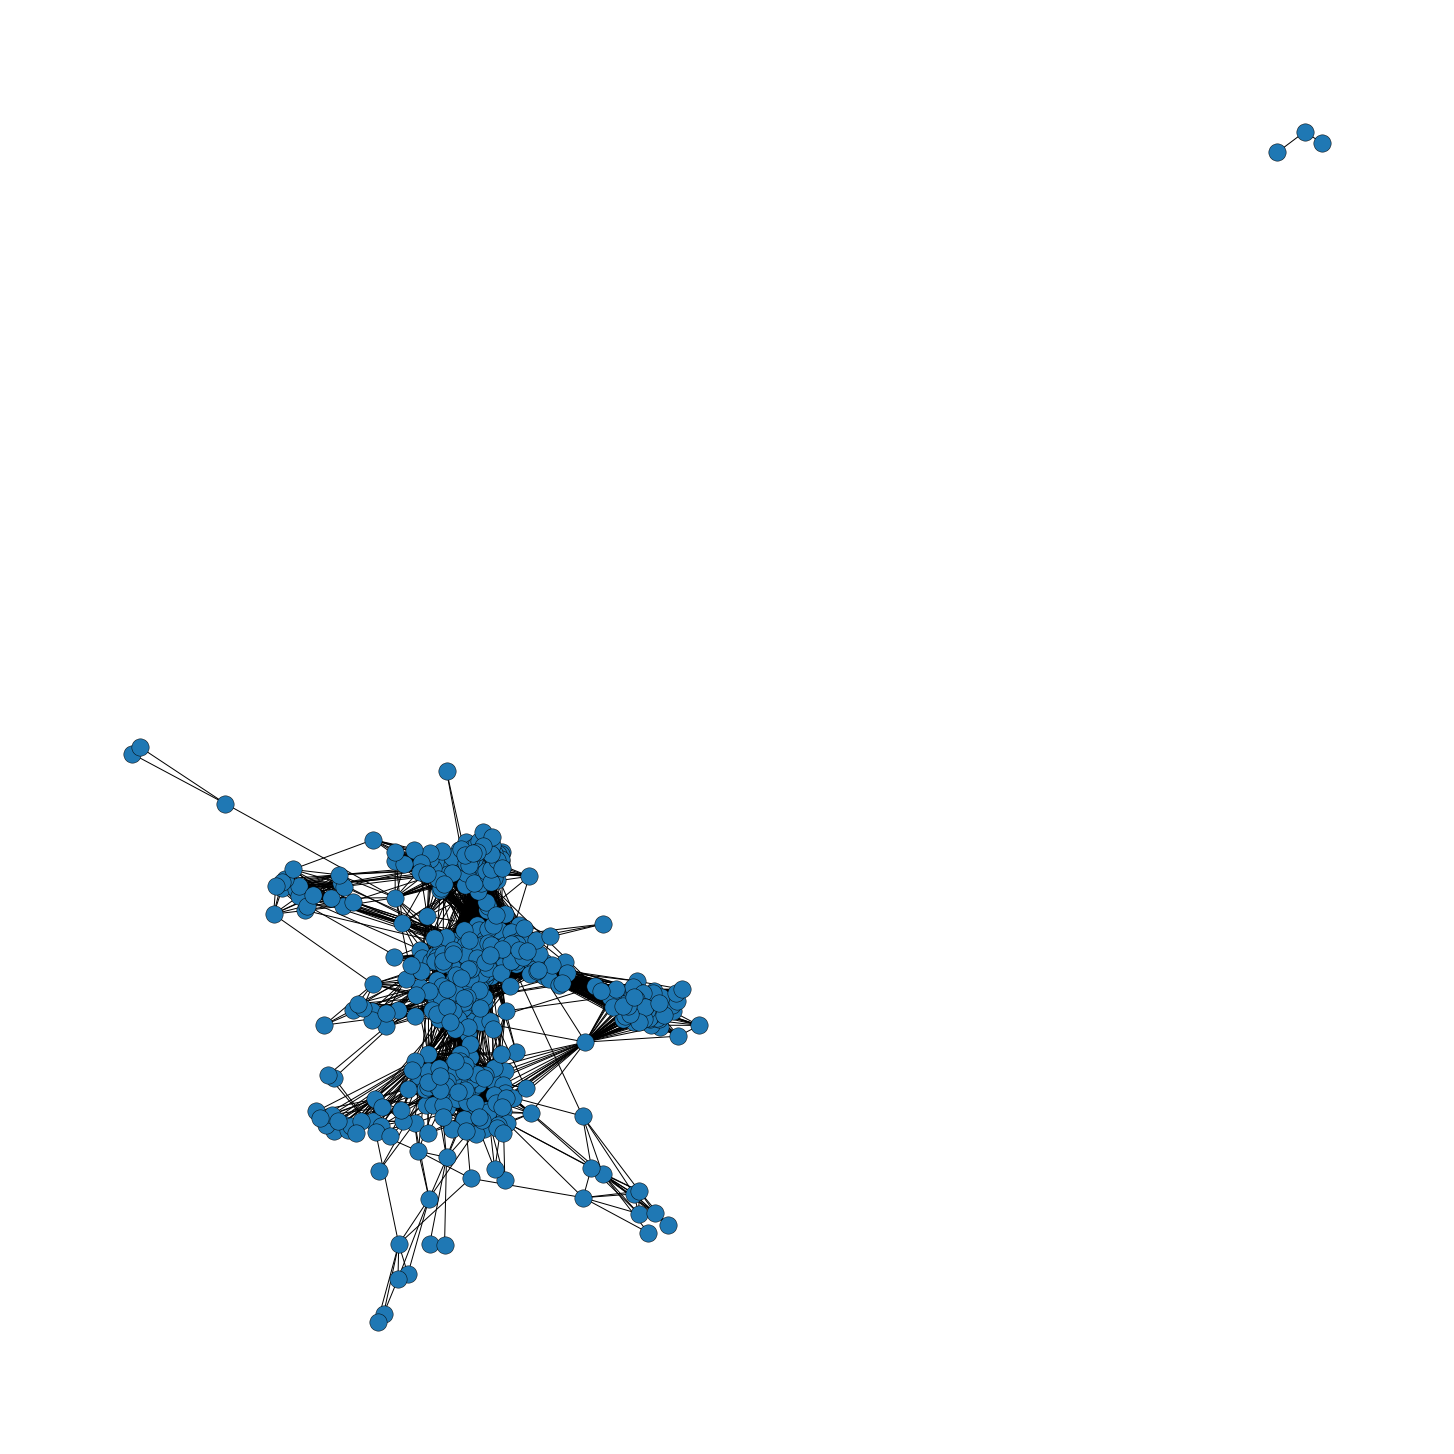

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
nx.draw(G)
plt.gca().collections[0].set_edgecolor("#000000")

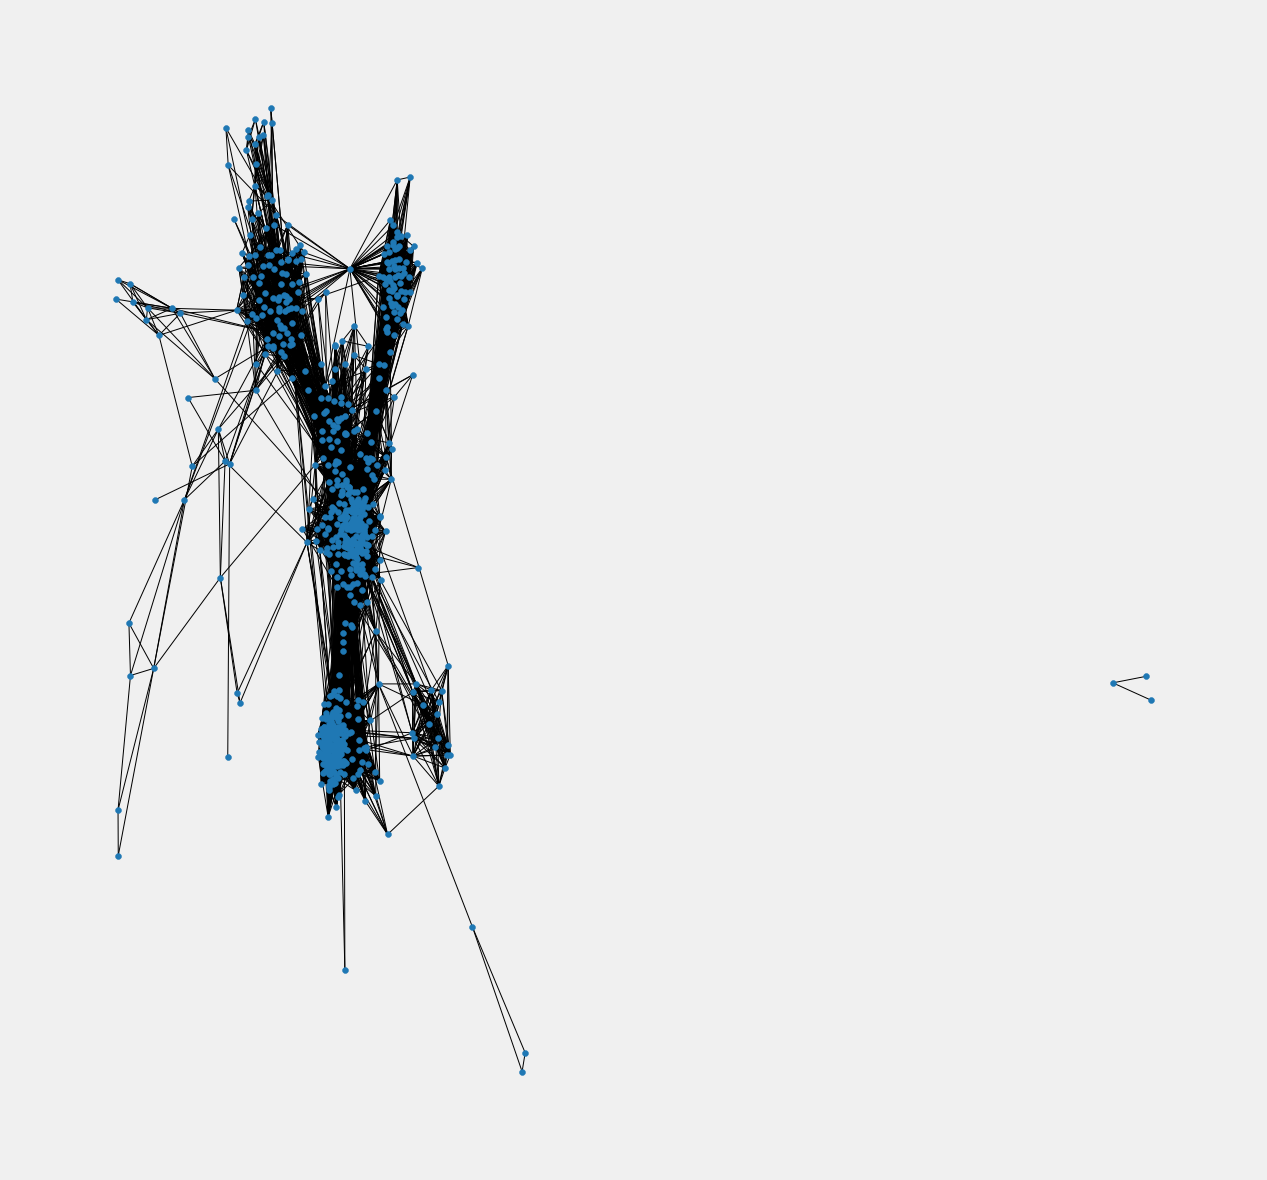

In [ ]:
pos = nx.spring_layout(G) 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 20)
plt.axis('off')
nx.draw_networkx(G, pos, with_labels = False, node_size = 35)
plt.show()

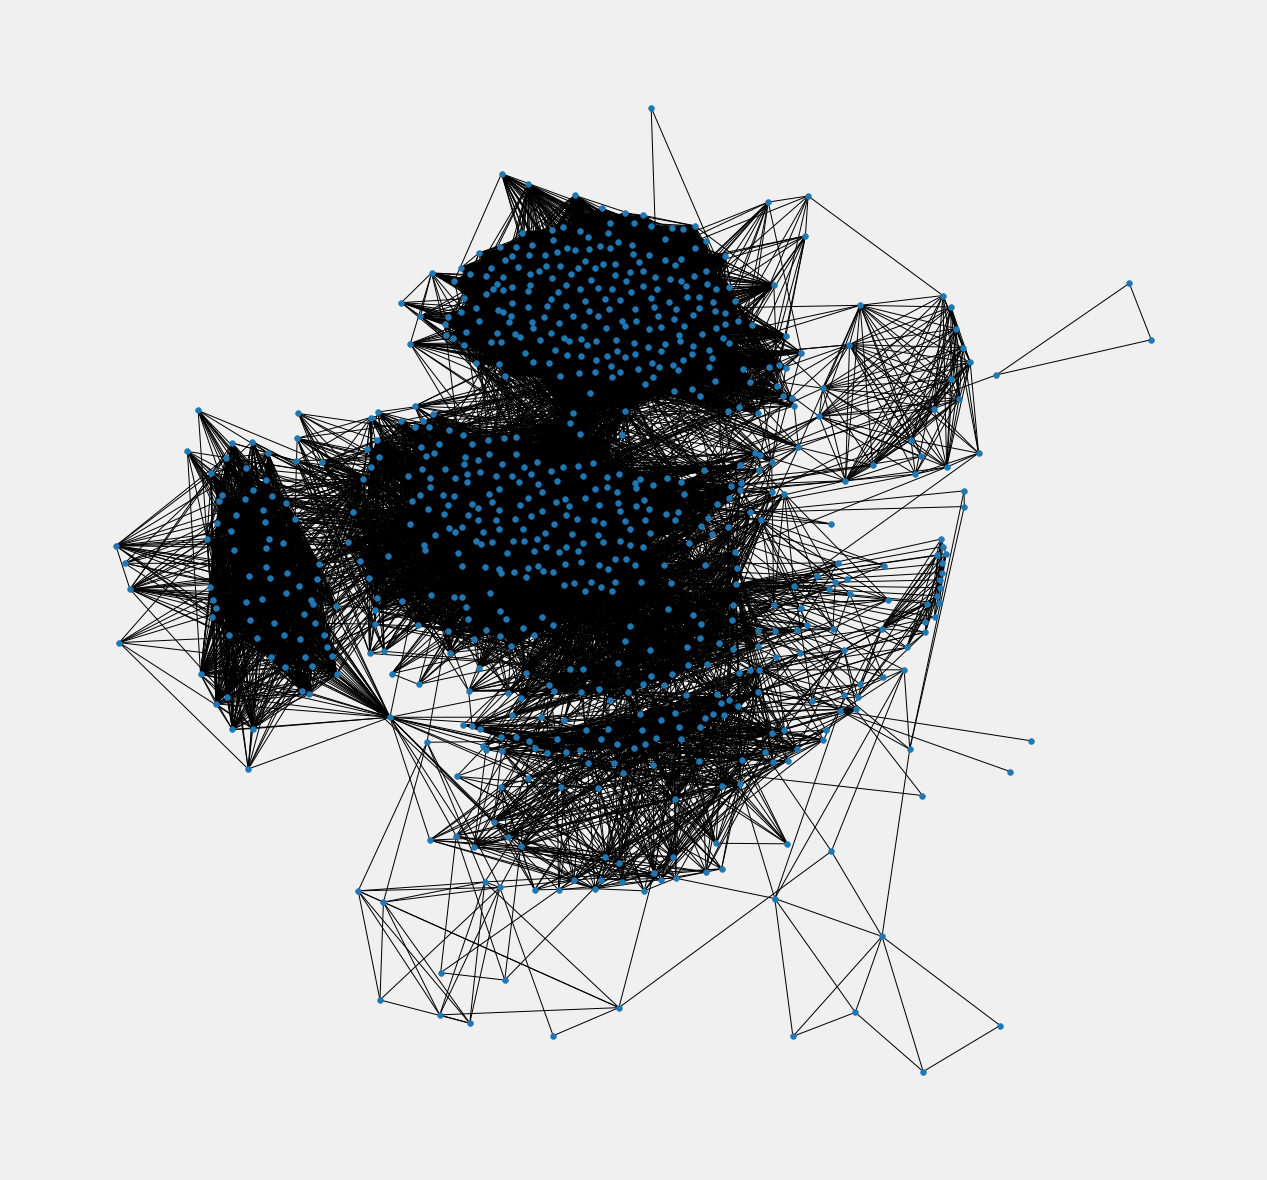

In [ ]:
kpos = nx.kamada_kawai_layout(G)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 20)
plt.axis('off')
nx.draw_networkx(G, kpos, with_labels = False, node_size = 35)
plt.show()

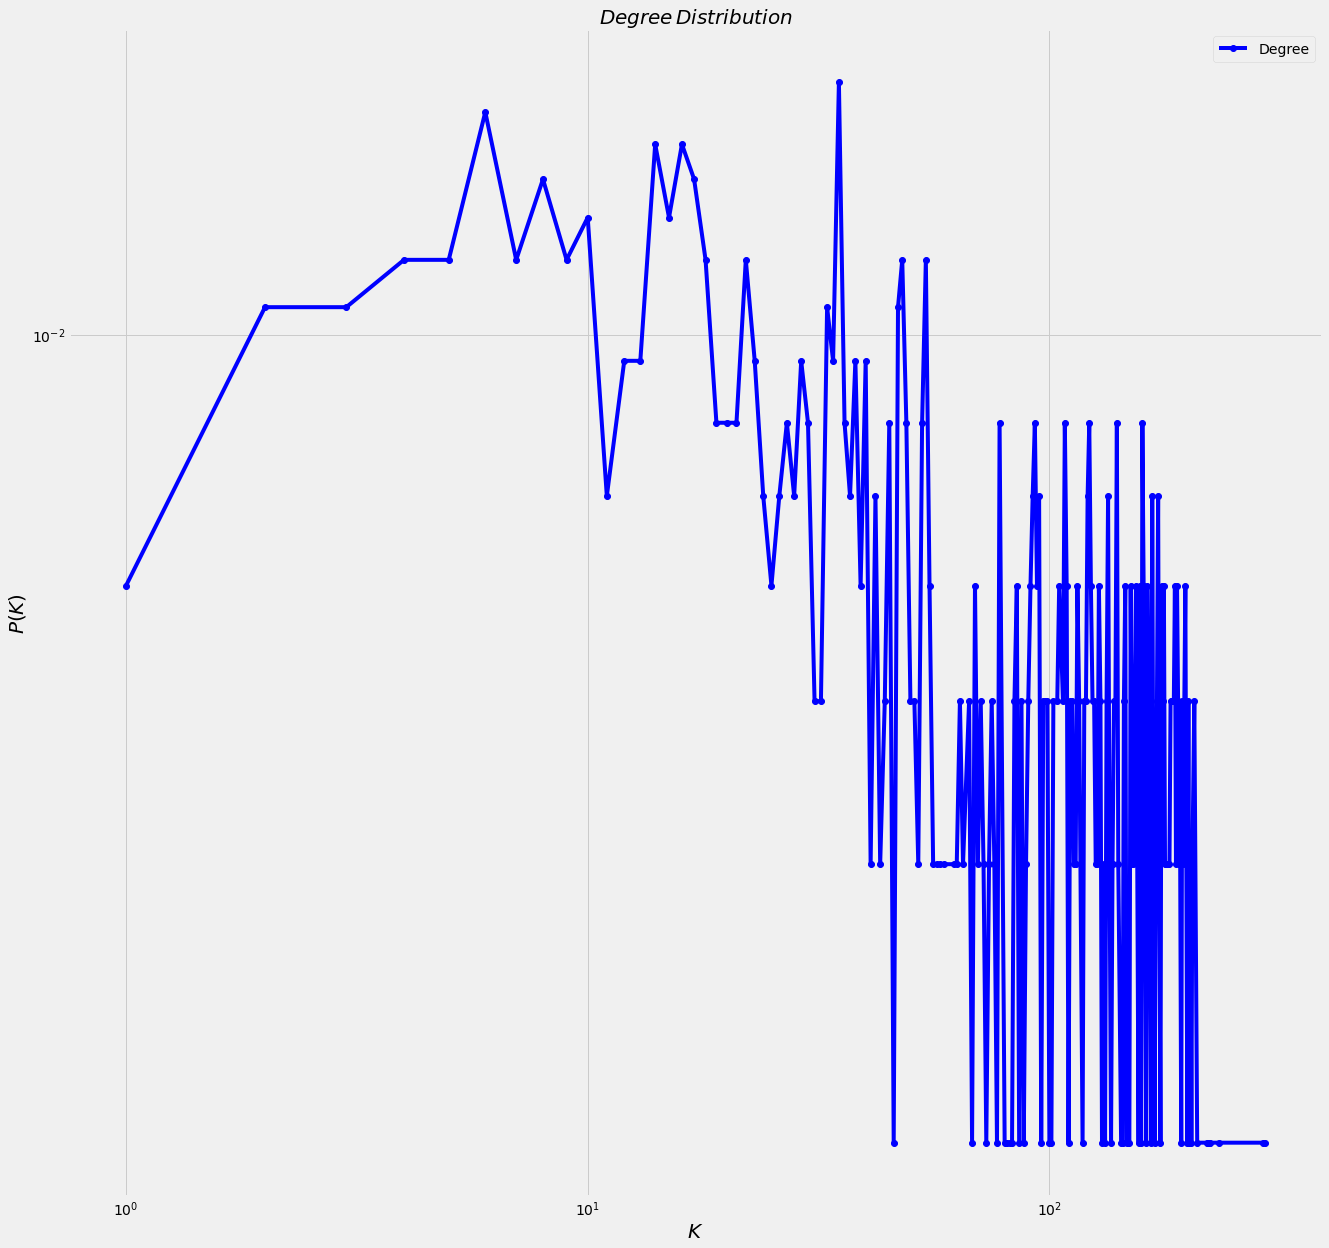

In [ ]:
from collections import defaultdict
import numpy as np

def plotDegreeDistribution(G):
    degs = defaultdict(int)
    for i in dict(G.degree()).values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o')
    plt.xscale('log') # to compress scale
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P(K)$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()   
    

plotDegreeDistribution(G)

In [ ]:
# Get the list of the degrees
degree_sequence_G = list(G.degree())

degree_sequence_G 

Convert graph data in edges file to gml

In [ ]:
nx.write_gml(G, "facebook.gml")

Preprocessing

These are the lines of code inside the data processing function called data_to_adj_review() in the python code clustering_ss_review.py. Just for understanding or visualizing done here.

In [ ]:
import networkx as nx
import numpy
import numpy as np
#from others import normalize,recall_funct
from sklearn.metrics import precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import time
import random

h = nx.read_gml('./facebook.gml',label='id') # dataset in gml format is loaded to h
adj_mat_s = nx.adjacency_matrix(h) # adjacency matrix is computed and stored in adj_mat_s

In [ ]:
h

In [ ]:
adj_mat_s

<747x747 sparse matrix of type '<class 'numpy.longlong'>'
	with 60050 stored elements in Compressed Sparse Row format>

In [ ]:
adj_mat_s.shape

(747, 747)

In [ ]:
print(adj_mat_s)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 14)	1
  (0, 15)	1
  (0, 24)	1
  (0, 25)	1
  (0, 30)	1
  (0, 32)	1
  (0, 33)	1
  (0, 36)	1
  (0, 37)	1
  (0, 38)	1
  (0, 43)	1
  (0, 44)	1
  (0, 47)	1
  (0, 48)	1
  (0, 49)	1
  (0, 51)	1
  (0, 52)	1
  :	:
  (737, 738)	1
  (737, 746)	1
  (738, 737)	1
  (739, 721)	1
  (739, 733)	1
  (740, 518)	1
  (740, 522)	1
  (740, 656)	1
  (740, 678)	1
  (741, 656)	1
  (741, 720)	1
  (741, 745)	1
  (742, 655)	1
  (742, 656)	1
  (743, 176)	1
  (743, 180)	1
  (743, 185)	1
  (743, 647)	1
  (744, 383)	1
  (744, 511)	1
  (745, 655)	1
  (745, 656)	1
  (745, 720)	1
  (745, 741)	1
  (746, 737)	1


In [ ]:
n = adj_mat_s.shape[0]  # n gives the number of rows in the matrix
print (n)


747


In [ ]:
adj_mat_d = adj_mat_s.todense() # converted to a dense matrix
print(adj_mat_d)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
x = h.degree() # degree of each node in h is computed 
x

DegreeView({0: 183, 1: 166, 2: 35, 3: 29, 4: 170, 5: 190, 6: 189, 7: 123, 8: 35, 9: 30, 10: 105, 11: 194, 12: 173, 13: 157, 14: 125, 15: 196, 16: 97, 17: 124, 18: 122, 19: 222, 20: 47, 21: 93, 22: 17, 23: 21, 24: 172, 25: 203, 26: 99, 27: 101, 28: 128, 29: 137, 30: 200, 31: 109, 32: 145, 33: 187, 34: 28, 35: 141, 36: 206, 37: 185, 38: 176, 39: 108, 40: 160, 41: 54, 42: 53, 43: 150, 44: 134, 45: 31, 46: 17, 47: 175, 48: 125, 49: 154, 50: 154, 51: 200, 52: 186, 53: 209, 54: 164, 55: 180, 56: 197, 57: 140, 58: 221, 59: 172, 60: 121, 61: 54, 62: 147, 63: 78, 64: 145, 65: 119, 66: 175, 67: 93, 68: 95, 69: 140, 70: 187, 71: 64, 72: 48, 73: 42, 74: 33, 75: 194, 76: 121, 77: 155, 78: 193, 79: 112, 80: 138, 81: 293, 82: 195, 83: 154, 84: 146, 85: 21, 86: 138, 87: 62, 88: 159, 89: 104, 90: 83, 91: 183, 92: 156, 93: 180, 94: 140, 95: 133, 96: 76, 97: 191, 98: 186, 99: 167, 100: 152, 101: 172, 102: 178, 103: 179, 104: 192, 105: 158, 106: 33, 107: 33, 108: 37, 109: 176, 110: 71, 111: 184, 112: 177,

In [ ]:
degree_matrix = np.identity(n)
degree_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
degree_matrix_2 = np.identity(n)
degree_matrix_2 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
for i in range(1,n):
  #print (i)
  degree_matrix[i-1,i-1] = x[i] # x[i] has the degree of each node. that is stored in degree_matrix[i-1,i-1]
  degree_matrix[i-1,i-1] # degree_matrix now has the degree as its diagonal elements. all other elements are zero.
  if x[i] != 0 : # for all nodes whose degree is greater than 0 ( for all nodes that has atleast one link),
    degree_matrix_2[i-1,i-1] = 1/(x[i]**0.5) # reciprocal of square root of degree of each node is assigned to the second identity matrix

In [ ]:
degree_matrix_2.shape

(747, 747)

In [ ]:
print(degree_matrix)

[[166.   0.   0. ...   0.   0.   0.]
 [  0.  35.   0. ...   0.   0.   0.]
 [  0.   0.  29. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   4.   0.   0.]
 [  0.   0.   0. ...   0.   1.   0.]
 [  0.   0.   0. ...   0.   0.   1.]]


In [ ]:
print(degree_matrix_2)

[[0.07761505 0.         0.         ... 0.         0.         0.        ]
 [0.         0.16903085 0.         ... 0.         0.         0.        ]
 [0.         0.         0.18569534 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.5        0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
adj_orig = adj_mat_d
print(adj_orig)

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
adj_mat_i = adj_mat_d + np.identity(n) # identity matrix and dense matrix is summed and stored in adj_mat_i
print(adj_mat_i)

[[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
input_mat = np.matmul(adj_mat_i,degree_matrix)  # this sum (adj_mat_i) is multiplied with the degree valued matrix
print(input_mat)

[[166.  35.   0. ...   0.   0.   0.]
 [166.  35.   0. ...   0.   0.   0.]
 [  0.   0.  29. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   4.   0.   0.]
 [  0.   0.   0. ...   0.   1.   0.]
 [  0.   0.   0. ...   0.   0.   1.]]
